In [3]:
import nltk
!pip install markovify
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from transformers import pipeline


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 11.5 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18607 sha256=11ebd08817ab509969e9fb54be2ba679038e40cd6cc3228ce9815bf9c8a772a2
  Stored in directory: /root/.cache/pip/wheels/9c/20/eb/1a3fb93f3132f2f9683e4efd834800f80c53aeddf50e84ae80
Successfully built markovify


In [8]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
sample_text = """Artificial intelligence (AI) is transforming various industries by automating tasks, improving efficiency, and enabling data-driven decision-making. Machine learning, a subset of AI, allows systems to learn and make predictions without explicit programming."""


In [10]:
tokens = word_tokenize(sample_text.lower())  # Tokenize and convert to lowercase
words = [word for word in tokens if word.isalpha()]  # Remove punctuation
word_counts = Counter(words)  # Count word occurrences

<ipython-input-11-ebed3ca00101>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(word_counts.keys()), y=list(word_counts.values()), palette="Blues_r")


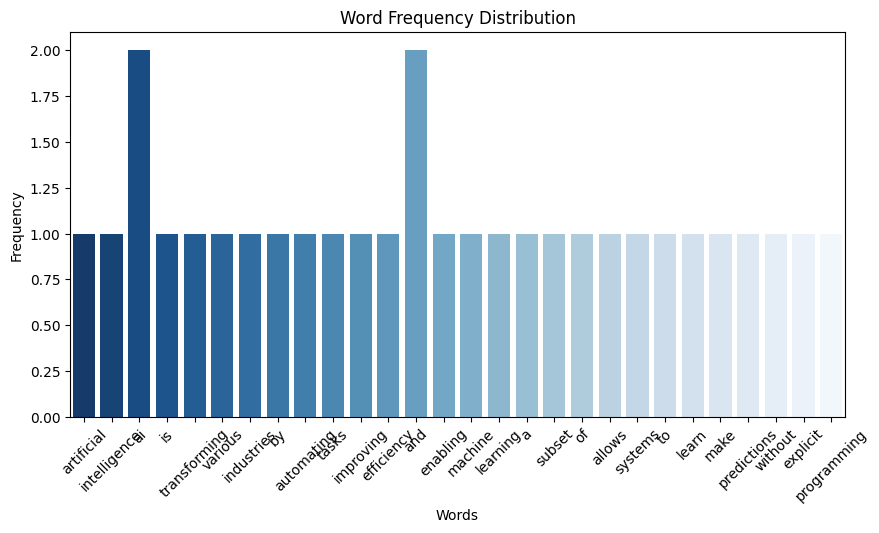

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(word_counts.keys()), y=list(word_counts.values()), palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution")
plt.show()

In [13]:
import markovify
text_model = markovify.Text(sample_text, state_size=2)
print("\nGenerated Text using Markov Model:")
for _ in range(3):
    print(text_model.make_sentence())

# GPT-Based Text Generation (Using Hugging Face transformers)
generator = pipeline("text-generation", model="gpt2")
generated_text = generator("Artificial intelligence is", max_length=50, num_return_sequences=1)
print("\nGenerated Text using GPT-2:")
print(generated_text[0]['generated_text'])



Generated Text using Markov Model:
None
None
None


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Generated Text using GPT-2:
Artificial intelligence is poised to create millions of jobs every day, and it's going to be increasingly hard for companies to avoid making costly mistakes while simultaneously getting paid for it by selling products that are less cost effective than some of the smarter, less profitable
